In [1]:
import urllib.request
import numpy as np
from sklearn import datasets, linear_model
from math import sqrt
import matplotlib.pyplot as plot
import pandas as pd

In [2]:
# Lectura de los datos
loc=r"winequality-red.csv"
data= pd.read_csv(loc,sep=";",)
names=list(data.columns.values)
label=list(data["quality"])
Xlist=(data.drop("quality",1))
Xlist=[Xlist.iloc[i] for i in range(len(Xlist))]

In [3]:
# Normalización de columnas en X y etiquetas
nrows= len(Xlist)
ncols=len(Xlist[0])

# Medias y varianzas
xMeans=[]
xSD=[]
for i in range(ncols):
    col=[Xlist[j][i] for j in range(nrows)]
    mean=sum(col)/nrows
    xMeans.append(mean)
    colDiff= [(Xlist[j][i]-mean) for j in range(nrows)]
    sumSq=sum([colDiff[i]**2 for i in range(nrows)])
    stdDev= sqrt(sumSq/nrows)
    xSD.append(stdDev)

# Uso de la media y desviación para normalizar
xNormalized=[]
for i in range(nrows):
    rowNormalized=[(Xlist[i][j]-xMeans[j])/xSD[j] for j in range(ncols)]
    xNormalized.append(rowNormalized)

# Normalización de las etiquetas
meanLabel=sum(label)/nrows
sdLabel=sqrt(sum([(label[i]-meanLabel)**2 for i in range(nrows)])/nrows)

labelNormalized=[(label[i]-meanLabel)/sdLabel for i in range(nrows)]

In [4]:
# Construcción del loop para la validación cruzada

nxval= 10                            # Número de validaciones cruzadas
nSteps= 350                          # Número de pasos
stepSize= 0.004                      # Tamaño del paso

# Inicialización de la lista para almacenar errores
errors=[]
for i in range(nSteps):
    b=[]
    errors.append(b)

# Definición de los índices para los conjuntos de entrenamiento y prueba    
for ixval in range(nxval):
    idxTest=[a for a in range(nrows) if a%nxval == ixval%nxval]
    idxTrain=[a for a in range(nrows) if a%nxval != ixval%nxval]    
     
    # Definir los conjuntos de prueba y entrenamiento    
    xTrain= [xNormalized[r] for r in idxTrain]
    xTest=[xNormalized[r] for r in idxTest]
    labelTrain=[labelNormalized[r] for r in idxTrain]
    labelTest=[labelNormalized[r] for r in idxTest]

    # Entrenar con el conjunto de entrenamiento
    nrowsTrain = len(idxTrain)
    nrowsTest = len(idxTest)
    
    #Iniciación del vector de betas
    beta = [0.0] * ncols
    
    #Iniciación de matriz de betas en cada paso
    betaMat = []
    betaMat.append(list(beta))
    
    for iStep in range(nSteps):
        residuals = [0.0]*nrows
        for j in range(nrowsTrain):
            labelsHat = sum([xTrain[j][k] * beta[k] for k in range(ncols)])
            residuals[j]=labelTrain[j] - labelsHat
            
        # Calculo de las correlaciones
        corr=[0.0]*ncols
        
        for j in range(ncols):
            corr[j]=sum([xTrain[k][j]*residuals[k] for k in range(nrowsTrain)])/nrowsTrain
            
        iStar=0
        corrStar=corr[0]
        
        for j in range (1,(ncols)):
            if abs(corrStar)<abs(corr[j]):
                iStar=j; corrStar=corr[j]
            
        beta[iStar] += stepSize*corrStar / abs(corrStar)
        betaMat.append(list(beta))
        
        # Uso de beta para calculo de errores, no para recalcularlo
        for j in range(nrowsTest):
            labelsHat=sum([xTest[j][k]*beta[k] for k in range(ncols)])
            err=labelTest[j] - labelsHat
            errors[iStep].append(err) 

Minimun Mean Square error 0.6494495844086485
Index of Minimum Mean Square Error 285


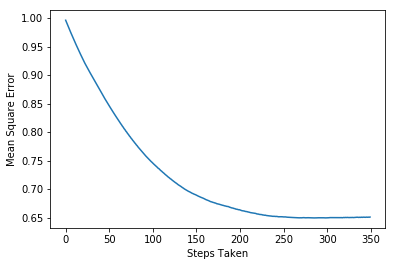

In [5]:
cvCurve=[]
for errVect in errors:
    mse=sum([x*x for x in errVect])/len(errVect)
    cvCurve.append(mse)
minMse=min(cvCurve)
minPt=[i for i in range(len(cvCurve)) if cvCurve[i]==minMse][0]
print("Minimun Mean Square error", minMse)
print("Index of Minimum Mean Square Error",minPt)

xaxis=range(len(cvCurve))
plot.plot(xaxis,cvCurve)

plot.xlabel("Steps Taken")
plot.ylabel(("Mean Square Error"))
plot.show()

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


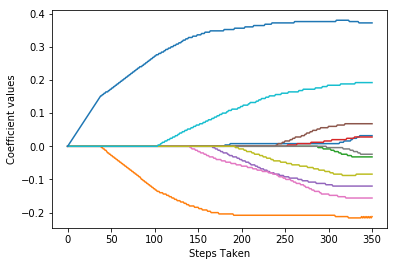

In [6]:
nzList=[]
nzbeta= [index for index in range(ncols) if beta[index] !=0.0]
for q in nzbeta:
    if (q in nzList)==False:
        nzList.append(q)
nameList=[names[nzList[i]] for i in range(len(nzList))]
print(nameList)
nPts= len(betaMat)
for i in range(ncols):
    coefCurve= [betaMat[k][i] for k in range(nPts)]
    xaxis=range(nPts)
    plot.plot(xaxis,coefCurve)
plot.xlabel("Steps Taken")
plot.ylabel(("Coefficient values"))
plot.show()